In [11]:
import sys
import os

sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

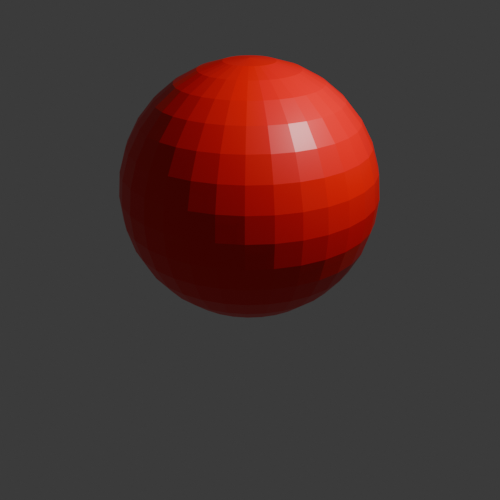

In [12]:
import bpy
from IPython.display import display, Image

bpy.ops.object.select_all(action="DESELECT")
bpy.ops.object.select_by_type(type="MESH")
bpy.ops.object.delete()

bpy.ops.mesh.primitive_uv_sphere_add(radius=2)
sphere = bpy.context.active_object
sphere.name = "MySphere"

geo_nodes = sphere.modifiers.new(name="GeometryNodes", type="NODES")
node_group = bpy.data.node_groups.new("GeometryNodes", "GeometryNodeTree")
geo_nodes.node_group = node_group

inNode = node_group.nodes.new("NodeGroupInput")
outNode = node_group.nodes.new("NodeGroupOutput")
transformNode = node_group.nodes.new("GeometryNodeTransform")

node_group.interface.new_socket(
    name="Geometry", in_out="INPUT", socket_type="NodeSocketGeometry"
)
node_group.interface.new_socket(
    name="Geometry", in_out="OUTPUT", socket_type="NodeSocketGeometry"
)

node_group.links.new(inNode.outputs["Geometry"], transformNode.inputs["Geometry"])
node_group.links.new(transformNode.outputs["Geometry"], outNode.inputs["Geometry"])

inNode.location = [-3 * inNode.width, 0]
outNode.location = [3 * outNode.width, 0]

transformNode.location = [0, 0]
transformNode.inputs["Translation"].default_value = (0, 0, 1)

# Create a new material
material = bpy.data.materials.new(name="RedMaterial")
material.diffuse_color = (1, 0, 0, 1)  # RGBA: Red, fully opaque

sphere.data.materials.append(material)

path = "test.png"
bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 500
bpy.ops.render.render()
bpy.data.images["Render Result"].save_render(filepath=path)
display(Image(filename=path))